## glmnet convergence

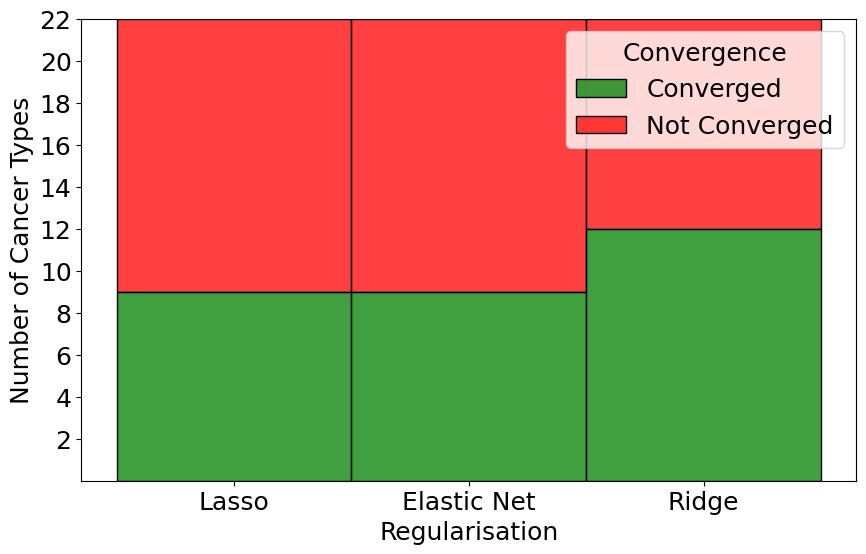

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({'font.size': 18})

data = {
    "Regularisation": ["Lasso"] * 22 + \
                      ["Elastic Net"] * 22 + \
                      ["Ridge"] * 22,
    "Convergence": ["Converged"] * 9 + ["Not Converged"] * 13 + \
                   ["Converged"] * 9 + ["Not Converged"] * 13 + \
                   ["Converged"] * 12 + ["Not Converged"] * 10,
    "n_ct": list(range(1, 23)) * 3
}

df = pd.DataFrame(data)

custom_palette = {'Converged': 'green', 'Not Converged': 'red'}

plt.figure(figsize=(10, 6))
axe = sns.histplot(data=df, 
                   x='Regularisation', 
                   hue='Convergence', 
                   multiple='stack', 
                   binwidth=0.5,
                   palette=custom_palette)
plt.ylabel('Number of Cancer Types')
plt.gca().invert_yaxis()
plt.yticks(np.arange(0,22,2), np.arange(22,0,-2))
axe.margins(y=0)
plt.show()

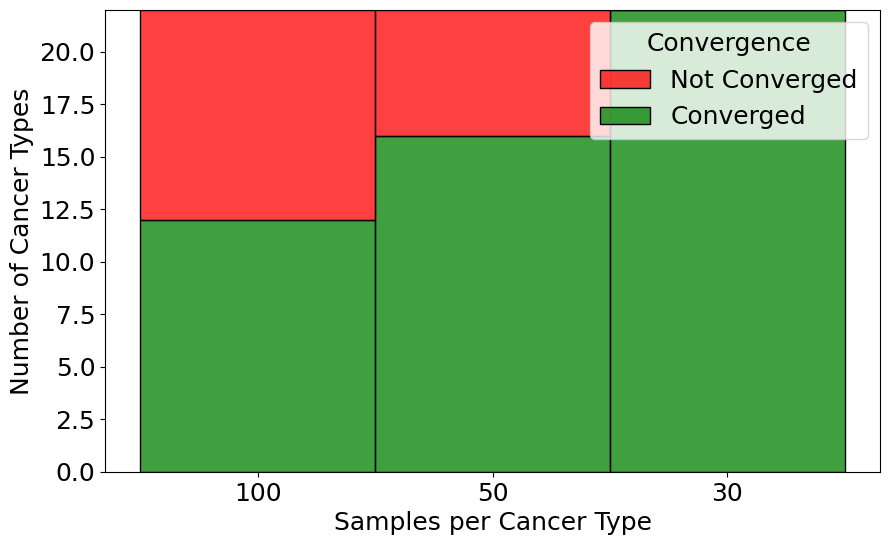

In [2]:

data = {
    "samples_per_ct": ["100"] * 22 + \
                     ["50"] * 22 + \
                     ["30"] * 22,
    "Convergence": ["Converged"] * 12 + ["Not Converged"] * 10 + \
                   ["Converged"] * 16 + ["Not Converged"] * 6 + \
                   ["Converged"] * 22 + ["Not Converged"] * 0,
    "n_ct": list(range(1, 23)) * 3
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
axe = sns.histplot(data=df, 
                   x='samples_per_ct', 
                   hue='Convergence', 
                   multiple='stack', 
                   binwidth=0.5,
                   palette=custom_palette,
                   hue_order=[ "Not Converged", "Converged"])
plt.xlabel("Samples per Cancer Type")
plt.ylabel('Number of Cancer Types')
sns.move_legend(axe, loc="upper right")
axe.margins(y=0)
plt.show()

# Variable importance plots

In [3]:
# imports and prep
import os
from pathlib import Path

project_root = Path.cwd().parent
os.chdir(project_root)
print(os.getcwd())

import pandas as pd

/homes/dwiersma/Desktop/internship


In [4]:
# load microarray subset
ma_data = pd.read_csv("data/subsets_sorted/ma_15ct_min100s.csv")
ma_data = ma_data.set_index("samples")
print(f"ma_data shape: {ma_data.shape}")

ma_data shape: (10547, 9710)


In [5]:
# load tcga subset
tcga_data = pd.read_csv("data/subsets_sorted/tcga_15ct_min100s.csv")
tcga_data = tcga_data.set_index("samples")
print(f"tcga_data shape: {tcga_data.shape}")

tcga_data shape: (5920, 9710)


In [6]:
# load forest models
import pickle as pkl

# ma forest
with open("/students/2023-2024/master/dwiersma/subsets_sorted/20240111112244_c3fb65/cforest_model.pkl", "rb") as file:
    ma_model = pkl.load(file)

# tcgaa forest
with open("/students/2023-2024/master/dwiersma/subsets_sorted/20240111141017_9e445a/cforest_model.pkl", "rb") as file:
    tcga_model = pkl.load(file)

In [7]:
# load variable importance

ma15_varimp = pd.read_csv("data/subsets_sorted/varimp/varimp_CF_ma15.csv")
ma15_varimp = ma15_varimp.rename({"Unnamed: 0": "TC", "0": "varimp"}, axis=1)
ma15_varimp = ma15_varimp.set_index("TC")

tcga15_varimp = pd.read_csv("data/subsets_sorted/varimp/varimp_CF_tcga15.csv")
tcga15_varimp = tcga15_varimp.rename({"Unnamed: 0": "TC", "0": "varimp"}, axis=1)
tcga15_varimp = tcga15_varimp.set_index("TC")

In [8]:
# most important TCs
ma15_varimp = ma15_varimp.sort_values(by="varimp", ascending=False)

tcga15_varimp = tcga15_varimp.sort_values(by="varimp", ascending=False)

print(ma15_varimp)
print(tcga15_varimp)

        varimp
TC            
6785  0.501809
339   0.489608
105   0.473166
9381  0.408657
3963  0.390113
...        ...
8912 -0.005469
4051 -0.005665
8144 -0.006363
4837 -0.006900
7496 -0.008920

[9709 rows x 1 columns]
        varimp
TC            
8732  1.118130
9579  0.917002
9658  0.880452
6803  0.856148
5858  0.788611
...        ...
6120 -0.018216
495  -0.023662
8957 -0.023726
4850 -0.024812
1210 -0.025344

[9673 rows x 1 columns]


Text(0.5, 1.0, 'TCGA15')

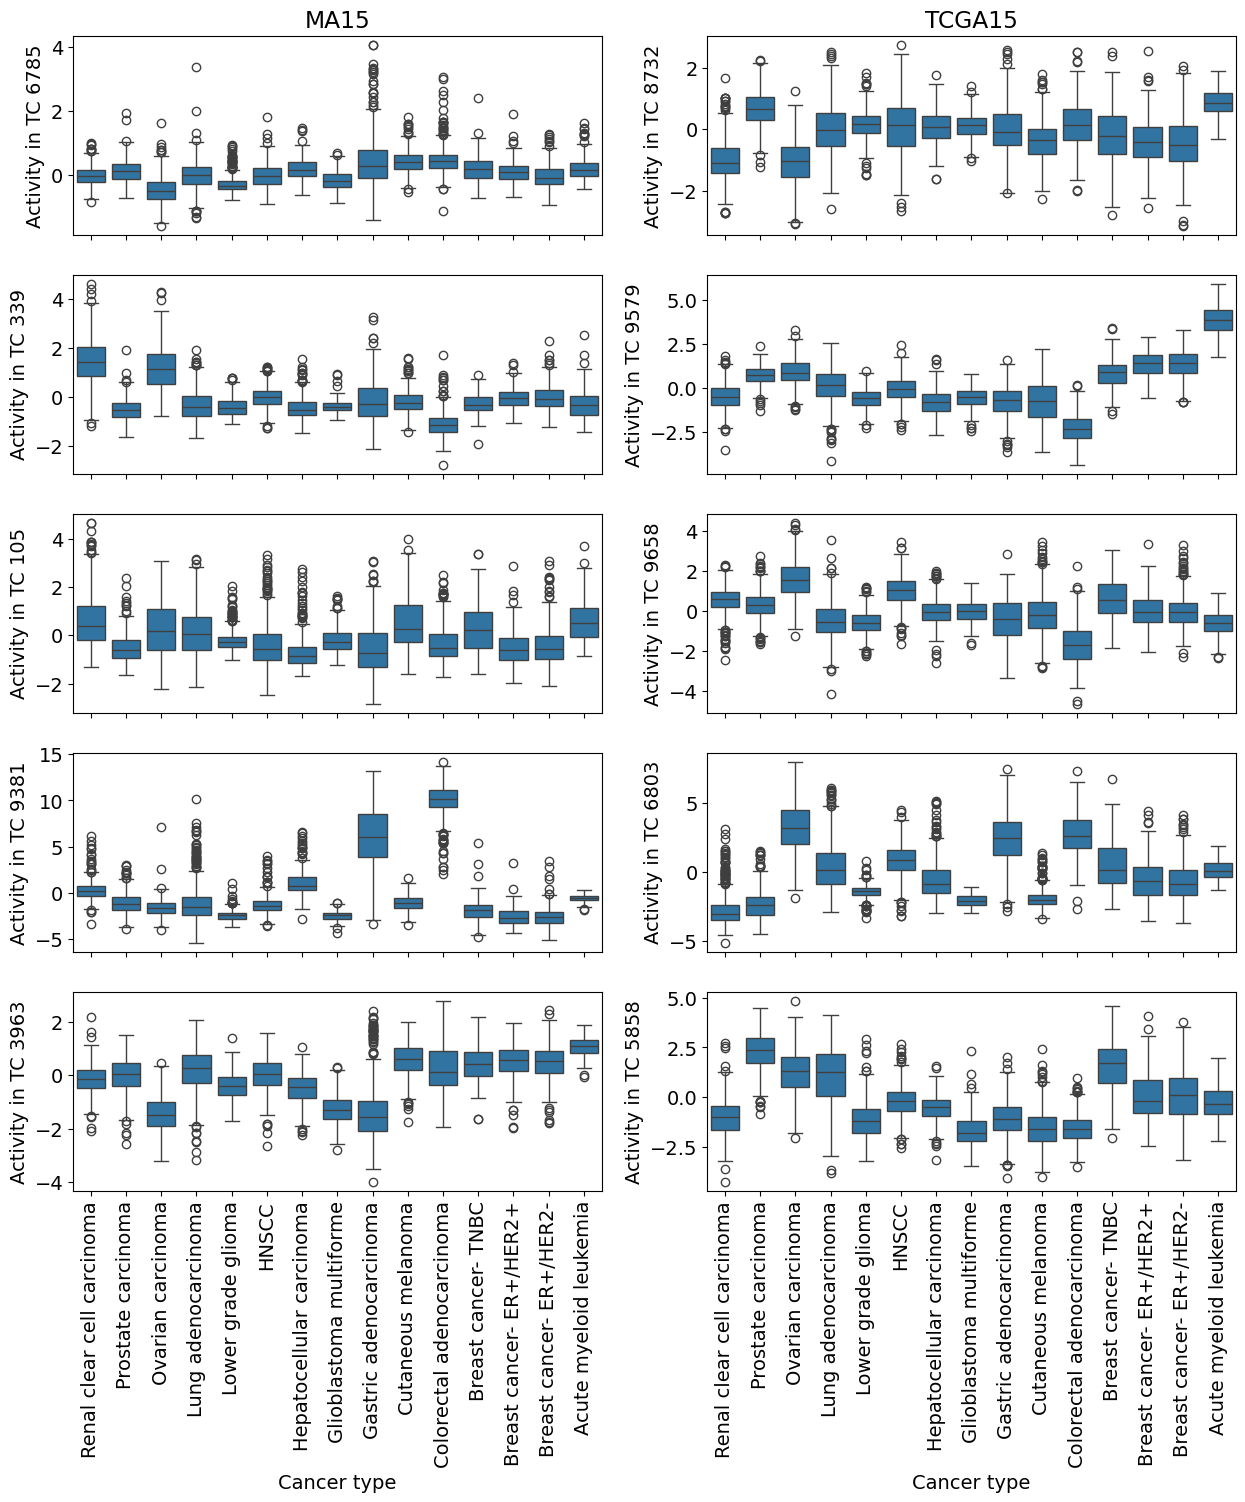

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({"font.size": 14})

fig, axs = plt.subplots(
    ncols=2, 
    nrows=5,
    sharex=True,
    figsize = (15, 15)
)

for i, (ma, tcga) in enumerate(zip(ma15_varimp.iterrows(), tcga15_varimp.iterrows())):
    if i > 4:
        break
        
    ma_tc = ma[0]
    ma_score = ma[1]

    tcga_tc = tcga[0]
    tcga_score = tcga[1]

    sns.boxplot(
        x=tcga_data["response"],
        y=tcga_data[f"consensus_independent_component_{ma_tc}"],
        ax=axs[i][0]
    )
    axs[i][0].tick_params(axis="x", labelrotation=90)
    axs[i][0].set_xlabel("Cancer type")
    axs[i][0].set_ylabel(f"Activity in TC {ma_tc}")
    # axs[i][0].set_ylim(-5, 15)

    sns.boxplot(
        x=tcga_data["response"],
        y=tcga_data[f"consensus_independent_component_{tcga_tc}"],
        ax=axs[i][1]
    )
    axs[i][1].tick_params(axis="x", labelrotation=90)
    axs[i][1].set_xlabel("Cancer type")
    axs[i][1].set_ylabel(f"Activity in TC {tcga_tc}")
    # axs[i][1].set_ylim(-5, 15)

axs[0][0].set_title("MA15")
axs[0][1].set_title("TCGA15")
    


## Varimp ranking plot

Text(0, 0.5, '')

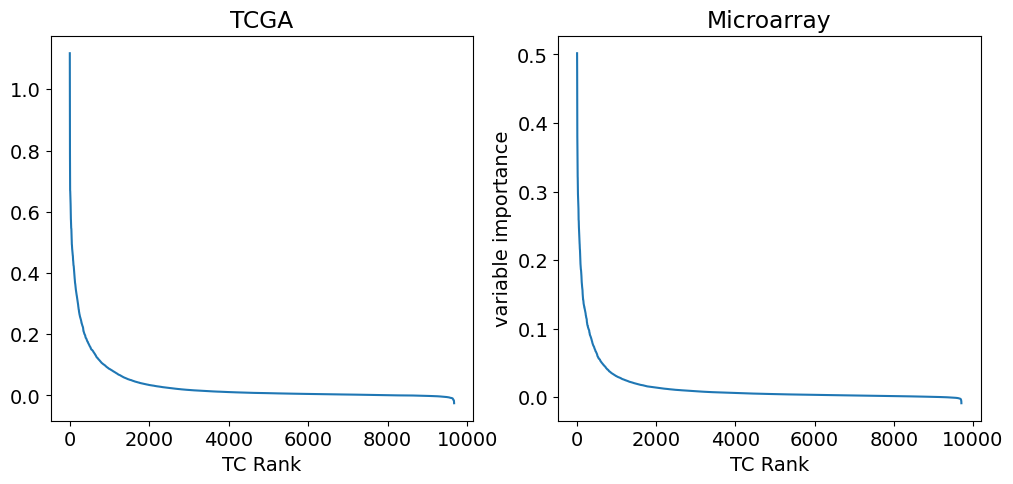

In [10]:
fig, axs = plt.subplots(ncols=2,
                        figsize=(12, 5))


sns.lineplot(
    y=ma15_varimp["varimp"],
    x=np.arange(0, ma15_varimp.shape[0]),
    ax=axs[1]
)

axs[1].set_title("Microarray")
axs[1].set_xlabel("TC Rank")
axs[1].set_ylabel("variable importance")

sns.lineplot(
    y=tcga15_varimp["varimp"],
    x=np.arange(0, tcga15_varimp.shape[0]),
    ax=axs[0]
)

axs[0].set_title("TCGA")
axs[0].set_xlabel("TC Rank")
axs[0].set_ylabel("")

In [11]:
sum_ma15_varimp = sum(ma15_varimp["varimp"])
sum_tcga15_varimp = sum(tcga15_varimp["varimp"])

cumsum_ma15_varimp = ma15_varimp.cumsum()
cumsum_tcga15_varimp = tcga15_varimp.cumsum()

Text(0, 0.5, 'cumulative sum of \nvariable importance (%)')

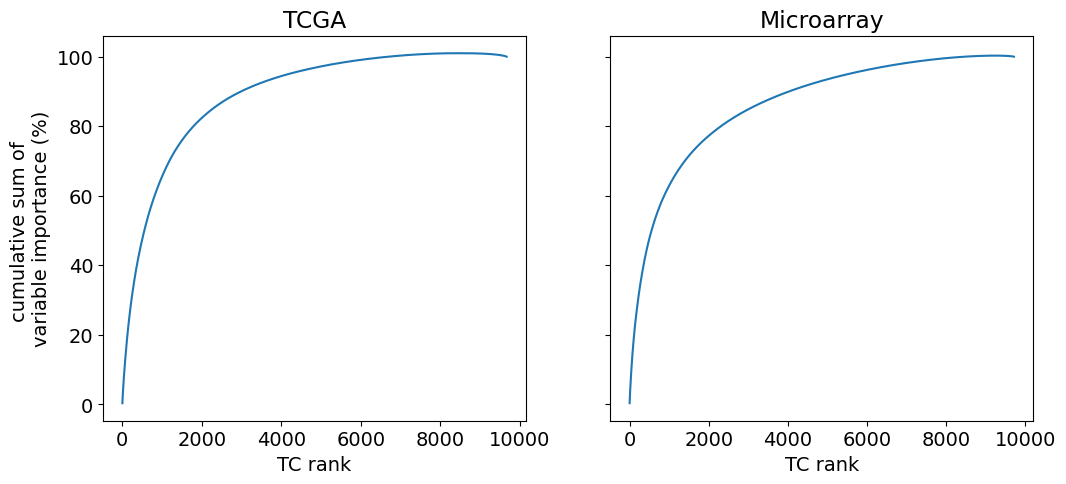

In [12]:
perc_ma15_varimp = cumsum_ma15_varimp.apply(lambda x: x / sum_ma15_varimp * 100)
perc_tcga15_varimp = cumsum_tcga15_varimp.apply(lambda x: x / sum_tcga15_varimp * 100)

fig, axs = plt.subplots(ncols=2,
                        figsize=(12, 5),
                        sharey=True)


sns.lineplot(
    y=perc_tcga15_varimp["varimp"],
    x=np.arange(0, perc_tcga15_varimp.shape[0]),
    ax=axs[0]
)

axs[0].set_title("TCGA")
axs[0].set_xlabel("TC rank")
axs[0].set_ylabel("cumulative sum of \nvariable importance (%)")

sns.lineplot(
    y=perc_ma15_varimp["varimp"],
    x=np.arange(0, perc_ma15_varimp.shape[0]),
    ax=axs[1]
)

axs[1].set_title("Microarray")
axs[1].set_xlabel("TC rank")
axs[1].set_ylabel("cumulative sum of \nvariable importance (%)")